In [21]:
import json
import os
from scipy import stats
from scipy.stats import normaltest, mannwhitneyu, ttest_ind, shapiro
import scipy



In [22]:
f = open('./datasets/fixtures.json')
dataset_1 = json.loads(f.read())
f.close()
# print(dataset_1)

f = open('./datasets/packages.json')
dataset_2 = json.loads(f.read())
f.close()
# print(angular_dataset)

In [23]:
def t_test():
    stat, p_val = ttest_ind(dataset_1, dataset_2,alternative='two-sided', trim=0)
    print("P-Value: " , p_val)

# t_test()

In [24]:
def mann_whitney():
    stat, p_val = mannwhitneyu(dataset_1, dataset_2, method="auto")
    # print(U1)
    print("P-Value: ", p_val)
# mann_whitney()

In [27]:


if shapiro(dataset_1).pvalue >= 0.005 and shapiro(dataset_2).pvalue >= 0.005:
     print ('normal distribution')
     t_test()
     
else:
     print('not normal distribution')
     mann_whitney()


not normal distribution
P-Value:  0.048711302943630075


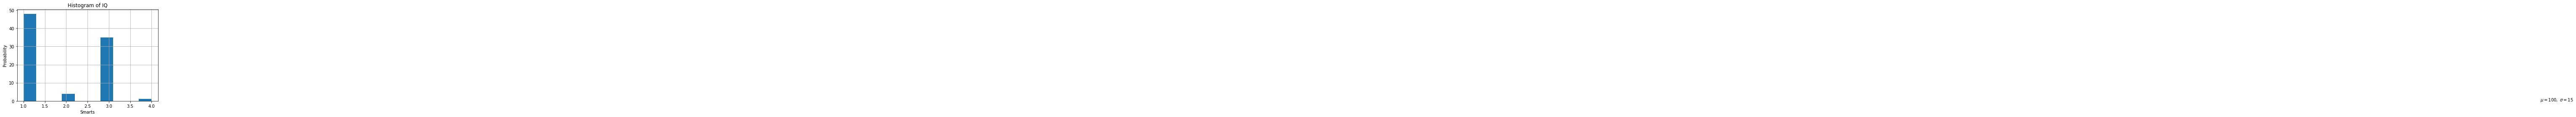

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# the histogram of the data
# print(react_dataset)
narray = np.array(dataset_1)
n, bins, patches = plt.hist(narray)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()